LOGISTIC REGRESSION

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

df1 = pd.read_csv('data/studentAssessment.csv')
df2 = pd.read_csv('data/courses.csv')
df3 = pd.read_csv('data/studentInfo.csv')

# Merge df1 (studentAssessment) and df3 (studentInfo) on 'id_student'
merged_df = pd.merge(df1, df3, on='id_student')

# Merge the result with df2 (courses) on 'code_module' and 'code_presentation'
combined_df = pd.merge(merged_df, df2, on=['code_module', 'code_presentation'])

# Calculate 'engagement_rate' after merging
combined_df['engagement_rate'] = combined_df['score'] / combined_df['module_presentation_length']

# Perform one-hot encoding on 'highest_education'
combined_df = pd.get_dummies(combined_df, columns=['highest_education'])

combined_df.loc[:, 'score'] = combined_df['score'].fillna(combined_df['score'].median())
combined_df.loc[:, 'engagement_rate'] = combined_df['engagement_rate'].fillna(combined_df['engagement_rate'].median())
combined_df.loc[:, 'imd_band'] = combined_df['imd_band'].fillna(combined_df['imd_band'].mode()[0])

# Print the columns to verify the one-hot encoding
print(combined_df.columns)

# Preprocess the data and split into features (X) and target variable (y)
# Include other relevant features
X = combined_df[['engagement_rate','num_of_prev_attempts', 'highest_education_HE Qualification', 
                 'highest_education_A Level or Equivalent', 'highest_education_Lower Than A Level', 
                 'highest_education_Post Graduate Qualification', 'highest_education_No Formal quals']]
y = combined_df['final_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score',
       'code_module', 'code_presentation', 'gender', 'region', 'imd_band',
       'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability',
       'final_result', 'module_presentation_length', 'engagement_rate',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification'],
      dtype='object')
Accuracy: 0.5698437198533668
              precision    recall  f1-score   support

 Distinction       0.41      0.06      0.10      6065
        Fail       0.37      0.07      0.12      6584
        Pass       0.58      0.96      0.72     23648
   Withdrawn       0.00      0.00      0.00      5167

    accuracy                           0.57     41464
   macro avg       0.34      0.27      0.24     41464
weighted avg       0.45  

LOGISTIC REGRESSION WITH SMOTE

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

df1 = pd.read_csv('data/studentAssessment.csv')
df2 = pd.read_csv('data/courses.csv')
df3 = pd.read_csv('data/studentInfo.csv')

# Merge df1 (studentAssessment) and df3 (studentInfo) on 'id_student'
merged_df = pd.merge(df1, df3, on='id_student')

# Merge the result with df2 (courses) on 'code_module' and 'code_presentation'
combined_df = pd.merge(merged_df, df2, on=['code_module', 'code_presentation'])

# Calculate 'engagement_rate' after merging
combined_df['engagement_rate'] = combined_df['score'] / combined_df['module_presentation_length']

# Perform one-hot encoding on 'highest_education'
combined_df = pd.get_dummies(combined_df, columns=['highest_education'])

combined_df.loc[:, 'score'] = combined_df['score'].fillna(combined_df['score'].median())
combined_df.loc[:, 'engagement_rate'] = combined_df['engagement_rate'].fillna(combined_df['engagement_rate'].median())
combined_df.loc[:, 'imd_band'] = combined_df['imd_band'].fillna(combined_df['imd_band'].mode()[0])

# Print the columns to verify the one-hot encoding
print(combined_df.columns)

# Preprocess the data and split into features (X) and target variable (y)
# Include other relevant features
X = combined_df[['engagement_rate','num_of_prev_attempts', 'highest_education_HE Qualification', 
                 'highest_education_A Level or Equivalent', 'highest_education_Lower Than A Level', 
                 'highest_education_Post Graduate Qualification', 'highest_education_No Formal quals']]
y = combined_df['final_result']

# Perform mean imputation on X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score',
       'code_module', 'code_presentation', 'gender', 'region', 'imd_band',
       'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability',
       'final_result', 'module_presentation_length', 'engagement_rate',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification'],
      dtype='object')
Accuracy: 0.3551514566853174
              precision    recall  f1-score   support

 Distinction       0.28      0.73      0.41      6065
        Fail       0.28      0.51      0.37      6584
        Pass       0.66      0.27      0.38     23648
   Withdrawn       0.14      0.11      0.13      5167

    accuracy                           0.36     41464
   macro avg       0.34      0.41      0.32     41464
weighted avg       0.48  

RANDOM FOREST CLASSIFIER 

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.5809617981863785
              precision    recall  f1-score   support

 Distinction       0.50      0.17      0.26      6065
        Fail       0.42      0.15      0.22      6584
        Pass       0.60      0.92      0.73     23648
   Withdrawn       0.33      0.06      0.10      5167

    accuracy                           0.58     41464
   macro avg       0.46      0.32      0.32     41464
weighted avg       0.52      0.58      0.50     41464



In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Train the model using the best parameters
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_rf = best_grid.predict(X_test)

# Evaluate the model's performance
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Accuracy (Best Random Forest):", accuracy_best_rf)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.7s
[CV] END max_dep

GRADIENT BOOSTING CLASSFIER 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred_gb))

Accuracy (Gradient Boosting): 0.5814200270113834
              precision    recall  f1-score   support

 Distinction       0.54      0.10      0.17      6065
        Fail       0.42      0.11      0.18      6584
        Pass       0.59      0.96      0.73     23648
   Withdrawn       0.43      0.01      0.01      5167

    accuracy                           0.58     41464
   macro avg       0.49      0.29      0.27     41464
weighted avg       0.54      0.58      0.47     41464



In [14]:
combined_df.isnull().sum()

id_assessment                                    0
id_student                                       0
date_submitted                                   0
is_banked                                        0
score                                            0
code_module                                      0
code_presentation                                0
gender                                           0
region                                           0
imd_band                                         0
age_band                                         0
num_of_prev_attempts                             0
studied_credits                                  0
disability                                       0
final_result                                     0
module_presentation_length                       0
engagement_rate                                  0
highest_education_A Level or Equivalent          0
highest_education_HE Qualification               0
highest_education_Lower Than A 

EXPLORATORY DATA ANALYSIS (EDA)

       id_assessment    id_student  date_submitted      is_banked  \
count  207319.000000  2.073190e+05   207319.000000  207319.000000   
mean    26708.371727  7.045991e+05      114.501493       0.017119   
std      8428.225700  5.504178e+05       72.473110       0.129713   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     24284.000000  5.066790e+05       50.000000       0.000000   
50%     25357.000000  5.854490e+05      114.000000       0.000000   
75%     34881.000000  6.334320e+05      172.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  num_of_prev_attempts  studied_credits  \
count  207319.000000         207319.000000    207319.000000   
mean       75.406398              0.156768        78.153474   
std        19.071231              0.460741        38.000677   
min         0.000000              0.000000        30.000000   
25%        65.000000              0.000000        60.000000   


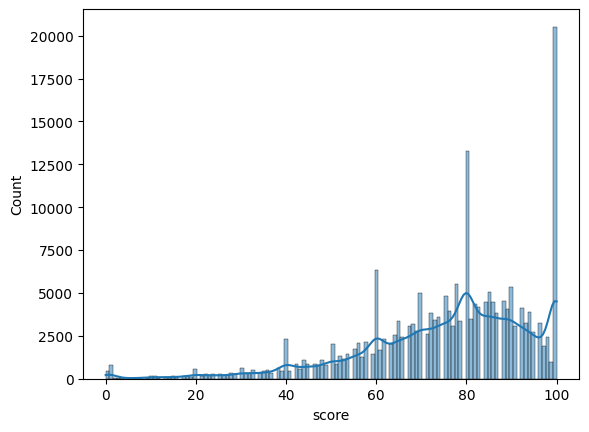

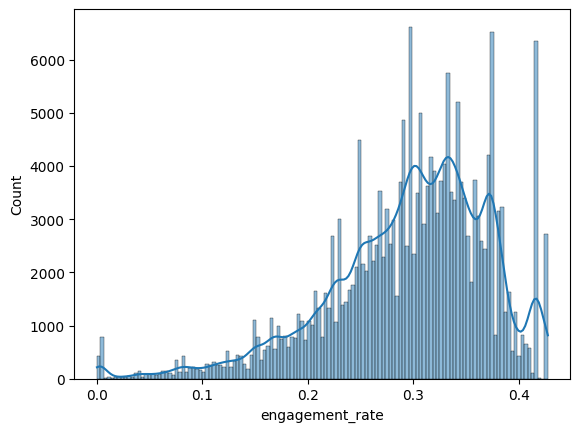

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get a summary of the data
print(combined_df.describe())

# Visualize the distribution of the 'score' column
sns.histplot(data=combined_df, x='score', kde=True)
plt.show()

# Visualize the distribution of the 'engagement_rate' column
sns.histplot(data=combined_df, x='engagement_rate', kde=True)
plt.show()